# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Patryk Duniak 253003

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

## Zajęcia 4

1. Wczytanie sygnałów i ich interpretacja, odczytanie częstotliwości sygnałów sinusoidalnych.
2. Transformata Fouriera jako narzędzie do analizy częstotliwościowej.
3. Decymacja i aliasing - czym jest i jak ją interpretować.
4. Przeciek widma - kiedy występuje?
5. Spektrogram jako narzędzie do analizy czasowo-częstotliwościowej.

Co przygotować w domu na następne zajęcia?

1. Przeanalizować wszystko o czym rozmawialiśmy dzisiaj (uwaga! będę pytać losowo wybrane osoby)
2. Rozumieć i umieć samodzielnie napisać to co było do tej pory na zajęciach
3. Dokończyć zadania z tego notebooka
___

## Zanim przejdziecie dalej uruchomcie komórkę poniżej

In [1]:
% pkg install -forge signal
pkg load signal

### Zadanie 1

Na pierwszych i drugich zajęciach nauczyliśmy się ustalać częstotliwość sygnału sinusoidalnego na podstawie przebiegu czasowego. Spróbujmy zrobić to ponownie - w plikach sig_1.mat oraz sig_2.mat znajdują się zapisane sygnały. Wyrysuj ich przebieg w czasie i postaraj się odczytać częstotliwość sygnałów sinusoidalnych. Częstotliwość próbkowania wynosi $f_s=2 [kHz]$.
Czy udało Ci się w obu przypadkach rozszyfrować z jakich sygnałów sinusoidalnych składa się sygnał? Odpowiedź zapisz w komórce poniżej kodu.



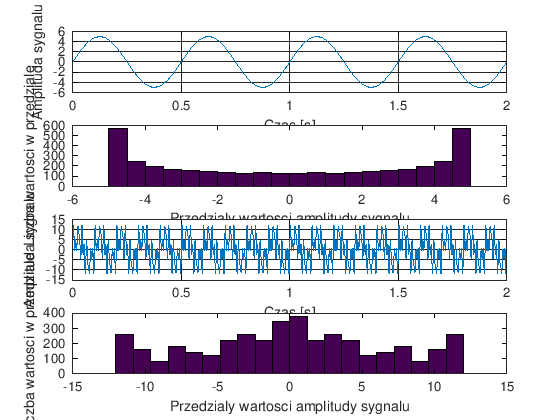

In [2]:
% tutaj jest mijesce na napisanie kodu
load("sig_1.mat");
load("sig_2.mat");
Fs=2000;

dt=1/Fs;
t1=0:dt:length(sig_1)*dt-dt;
t2=0:dt:length(sig_2)*dt-dt;

figure
subplot(4,1,1)
plot(t1, sig_1)
xlabel('Czas [s]')
ylabel('Amplituda sygnalu')
grid on



subplot(4,1,2)
hist(sig_1, 20)
xlabel('Przedzialy wartosci amplitudy sygnalu')
ylabel('Liczba wartosci w przedziale')



subplot(4,1,3)
plot(t2, sig_2)
xlabel('Czas [s]')
ylabel('Amplituda sygnalu')
grid on



subplot(4,1,4)
hist(sig_2, 20)
xlabel('Przedzialy wartosci amplitudy sygnalu')
ylabel('Liczba wartosci w przedziale')







**ODPOWIEDŹ:**


W 1 przypadku jest to pewien sygnał sinusoidalny przesunięty w fazie, z racji że okres wynosi 0.5s to częstotliwość wynosi 2Hz, w 2 przypadku nie jesteśmy w stanie tego stwierdzić.




## Transformata Fouriera

Cyfrowe sygnały mogą być analizowane w dziedzinie czasu oraz w dziedzinie częstotliwości. Algorytmy działające w dziedzinie czasu operują bezpośrednio na próbkach cyfrowego sygnału. Analiza częstotliwościowa sygnału, stosowana w wielu operacjach cyfrowego przetwarzania sygnałów, polega na przekształceniu sygnału z dziedziny czasu do dziedziny częstotliwości. Widmo sygnału (ang. spectrum) to reprezentacja częstotliwościowa sygnału, często mówi się więc o analizie widmowej.

Jean-Baptiste Joseph Fourier odkrył, że dowolny sygnał okresowy można przedstawić w postaci szeregu Fouriera, czyli sumy sygnałów trygonometrycznych (kosinusów i sinusów) o różnych amplitudach i częstotliwościach. Operację przekształcenia sygnału z dziedziny czasu do dziedziny częstotliwości nazywa się przekształceniem (transformacją) Fouriera (Fourier transform). Wynik tej operacji, czyli częstotliwościową reprezentację sygnału, nazywa się transformatą Fouriera. W przypadku sygnałów dyskretnych (cyfrowych) mówimy o dyskretnym przekształceniu Fouriera (DFT - Discrete Fourier Transform). W praktyce zwykle nie oblicza się transformaty z definicji, stosuje się np. algorytm szybkiego przekształcenia Fouriera (FFT - Fast Fourier Transform).

Na podstawie N próbek sygnału otrzymujemy N wartości widmowych, pokrywających zakres od 0 do  fs , gdzie  fs  jest częstotliwością próbkowania, a  fs/2  jest częstotliwością Nyquista.


W naszym przypadku korzystać będziemy z funkcji **fft( )** do obliczenia transformaty oraz funkcji **stem( )** do jej wyrysowania.

### Zadanie 2

Oblicz transformatę Fouriera dla wczytanych wcześniej sygnałów oraz wyrysuj jej widmo amplitudowe.

Chcemy uzyskać dwa podwójne wykresy - na każdym z nich będziemy mieć sygnał w czasie, a pod nim wyrysowane widmo. Czy jesteśmy w stanie odczytać z jakich składowych sinusoidalnych składa się nasz sygnał?





In [3]:
% help fft
% help abs
% helpo stem

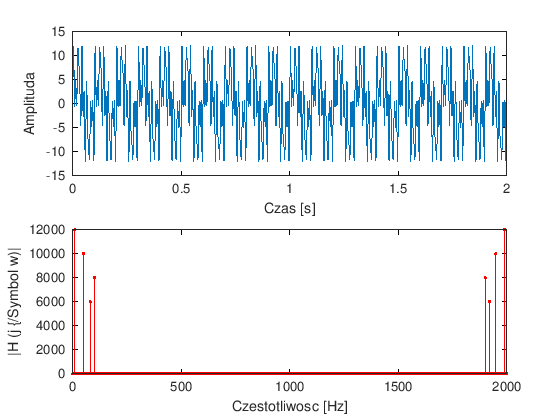

In [4]:
% tutaj jest miejsce na napisanie kodu
load("sig_2.mat");
fs=2000;
dt=1/fs;

t=0:dt:length(sig_2)*dt-dt;


tf_sig = fft(sig_2);
abs_tf_sig = abs(tf_sig);

N_tf = length(tf_sig);
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;


figure
subplot(2,1,1)
plot(t,sig_2)
xlabel('Czas [s]')
ylabel('Amplituda')

subplot(2,1,2)
stem(f, abs_tf_sig, 'r.')
xlabel('Czestotliwosc [Hz]')
ylabel('|H (j \\omega)|')



### Zadanie 3

Analiza częstotliwościowa szumu - sprawdźmy z jakich składowych sinusoidalnych składają się poszczególne szumy. W tym celu:
1. Za pomocą funkcji **`load`** wczytujemy dwa pliki z szumem do naszego programu. Nazwy zmiennych są tożsame z nazwami pliku (czyli po wykonaniu load mamy w programie dostępne zmienne `szum_1` oraz `szum_2`).
2. Generujemy wektor czasu dla naszego sygnału. Częstotliwość próbkowania wynosi $f_s=500[Hz]$, natomiast długość sygnału w próbkach (czyli długość wektora) można sprawdzić za pomocą funkcji **`length()`**. Dla ułatwienia szumy zostały zapisane z taką samą częstotliwością próbkowania i mają tyle samo próbek, więc wystarczy nam jeden wektor czasu.
2. Rysujemy pierwszy potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_1 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał 20 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
3. Rysujemy drugi potrójny wykres (trzy wiersze, jedna kolumna).  Na pierwszym z pól do rysowania niech będzie szum_2 w czasie, a w drugim wierszu niech będzie jego histogram. Histogram będzie miał tym razem 10 słupków. Trzeci wiersz to sygnał w dziedzinie częstotliwości.
4. Uruchamiamy komórkę i poprawiamy tytuły wykresów  (`title()`) na takie, które będą związane z rodzajem wyrysowanego szumu.


In [5]:
% dokumentacja do wykorzystywanych funkcji. Aby ją zobaczyć należy odkomentować linijkę która aktualnie Was interesuje
% help load
% help hist
% help fft
% help stem

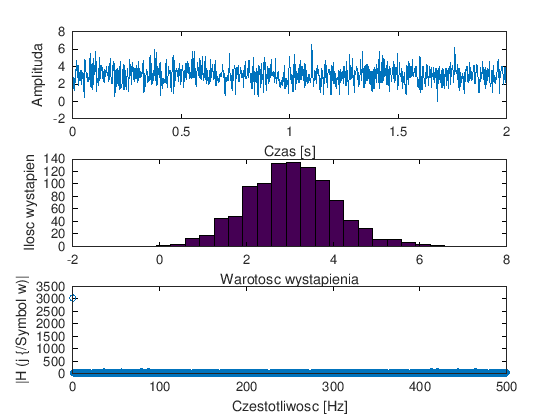

In [6]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_1
load("szum_1.mat");
fs=500;
dt=1/fs;

t=0:dt:length(szum_1)*dt-dt;

tf_szum_1 = fft(szum_1);
abs_tf_szum_1 = abs(tf_szum_1);

N_tf = length(tf_szum_1);
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;


figure
% rysunki dla szum_1
subplot(3,1,1)
plot(t,szum_1)
xlabel('Czas [s]')
ylabel('Amplituda')

subplot(3,1,2)
hist(szum_1,20)
xlabel('Warotosc wystapienia')
ylabel('Ilosc wystapien')

subplot(3,1,3)
stem(f, abs_tf_szum_1)
xlabel('Czestotliwosc [Hz]')
ylabel('|H (j \\omega)|')


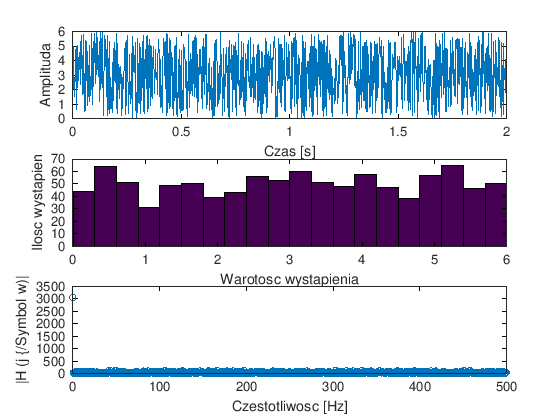

In [7]:
% tutaj jest miejsce na napisanie kodu
% poleceniem load załaduj sygnał szum_2

load("szum_2.mat");
fs=500;
dt=1/fs;

t=0:dt:length(szum_2)*dt-dt;

tf_szum_2 = fft(szum_2);
abs_tf_szum_2 = abs(tf_szum_2);

N_tf = length(tf_szum_2);
f_step = fs/N_tf;
f = 0:f_step:fs-f_step;




figure
% rysunki dla szum_2
subplot(3,1,1)
plot(t,szum_2)
xlabel('Czas [s]')
ylabel('Amplituda')

subplot(3,1,2)
hist(szum_2,20)
xlabel('Warotosc wystapienia')
ylabel('Ilosc wystapien')

subplot(3,1,3)
stem(f, abs_tf_szum_2)
xlabel('Czestotliwosc [Hz]')
ylabel('|H (j \\omega)|')

### Zadanie 5

Wczytaj, a następnie wyrysuj sygnał ___czepek.wav___ dostępny na moodlu przy poprzednim temacie. Pamiętaj o opisaniu wykresu! Skorzystaj z pierwszego pola w funkcji _subplot()_ - będziemy chcieli mieć dwa wykresy pod sobą (dwa wiersze, jedna kolumna).

Na drugim wykresie wyrysuj widmo amplitudowe tego sygnału. Co na jego podstawie możesz powiedzieć? Co jesteś w stanie powiedzieć na temat częstotliwości maksymalnej sygnału w stosunku do częstotliwości próbkowania?



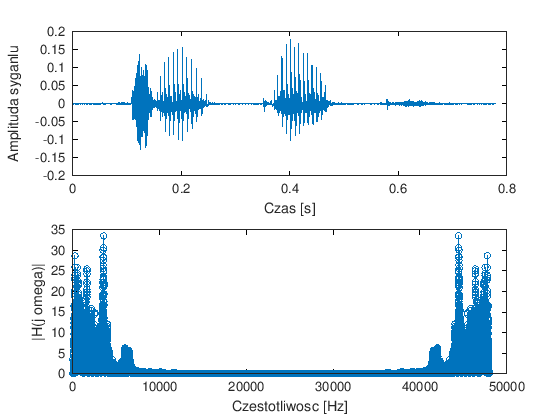

In [8]:
% tuaj jest miejsce na kod
[y,fs]=audioread('czepek.wav');
dt=1/fs;
t=0:dt:length(y)*dt-dt;

tf_y=fft(y);
abs_tf_y=abs(tf_y);

N_tf_y=length(tf_y);
f_step=fs/N_tf_y;
f=0:f_step:fs-f_step;

figure;
subplot(2,1,1)
plot(t,y)
xlabel('Czas [s]')
ylabel('Amplituda syganlu')

subplot(2,1,2)
stem(f,abs_tf_y)
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j omega)|')



**ODPOWIEDŹ**: 

Maks f wynosi ok 12kHz

## Decymacja

Czym jest decymacja? Na podstawie tego co usłyszałeś zapisz definicję zrozumiałą dla Ciebie :)

**Decymacja** - Polega na stworzeniu nowego sygnału wybierając co x próbke z danego sygnału na którym wykonujemy ten proces


### Zadanie 6

Przeanalizuj wczytane dzisiaj sygnały (sig_1, sig_2 oraz czepek) - czy możemy wykonać ich decymację? Jeśli tak to jakiego rzędu? Przeprowadź decymację sygnałów w których jest to możliwe. Za każdym razem wyrysuj przebieg czasowy i widmo amplitudowe przed decymacją oraz po niej. Czy coś się zmieniło na widmie? Przeanalizuj i opisz co dokładnie widzisz. Opisz wnioski ze swojego eksperymentu w polu odpowiedź.

Do wykonania decymacji użyj funkcji **decimate()**.

x_sig_1 = 16


x_sig_2 = 10


x_y = 4


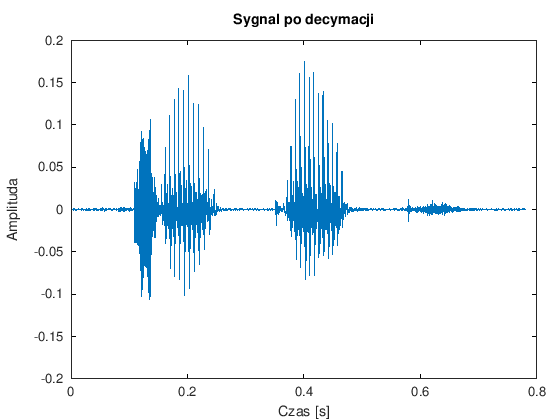

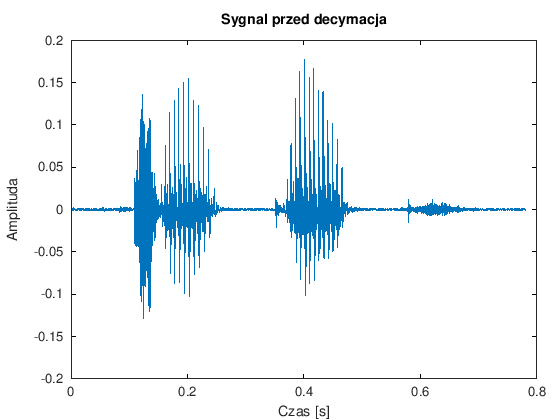

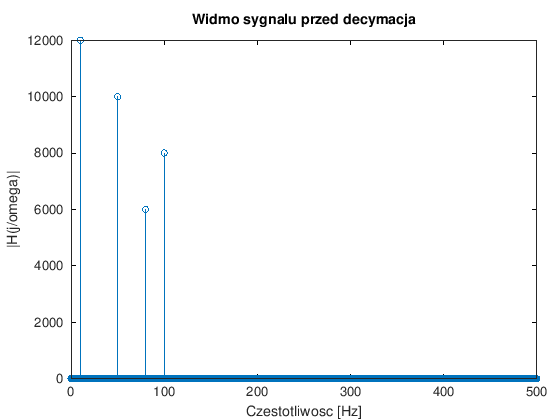

In [29]:
% tutaj jest miejesce na napisanie kodu
load("sig_1.mat");
load("sig_2.mat");


sig_fs=2000;

t_sig=0:1/sig_fs:(length(sig_1)-1)/sig_fs;

sig_1_tf=abs(fft(sig_1));
sig_2_tf=abs(fft(sig_2));

f_sig_step=sig_fs/length(sig_2_tf);
freq_sig=0:f_sig_step:sig_fs-f_sig_step;


sig_1_fmax=60;
x_sig_1=floor(sig_fs/(sig_1_fmax*2))
sig_1_decimate = decimate(sig_1, x_sig_1);
t_sig_dec = 0:(1/sig_fs)*x_sig_1:(length(sig_1)-1)/sig_fs;


sig_2_fmax=100;
x_sig_2=floor(sig_fs/(sig_2_fmax*2))
sig_2_decimate = decimate(sig_2, x_sig_2);
t_sig_dec_2 = 0:(1/sig_fs)*x_sig_2:(length(sig_2)-1)/sig_fs;


y_fs=fs;
t_y=0:1/y_fs:(length(y)-1)/y_fs;

y_tf=abs(fft(y));
f_y_step=y_fs/length(y_tf);
freq_y=0:f_y_step:y_fs-f_y_step;

sig_y_tf=abs(fft(y));

y_fmax=5000;
x_y=floor(y_fs/(y_fmax*2))
y_decimate = decimate(y, x_y);
t_y_dec = 0:(1/y_fs)*x_y:(length(y)-1)/y_fs;


figure
stem(freq_sig(1:sig_fs/2+1), sig_2_tf(1:sig_fs/2+1))
ylabel('|H(j/omega)|')
xlabel('Czestotliwosc [Hz]')
title('Widmo sygnalu przed decymacja')

figure
plot(t_y, y)
ylabel('Amplituda')
xlabel('Czas [s]')
title('Sygnal przed decymacja')

figure
plot(t_y_dec, y_decimate)
ylabel('Amplituda')
xlabel('Czas [s]')
title('Sygnal po decymacji')




**Odpowiedź:**
Z wykresu widma, odnajdujemy największą częstotliwość a następnie dla wzoru x=floor(fs/2fmax), wybieramy rząd decymacji, ale tak by zbytnio nie zniekształcić sygnału jeśli według wzoru
Dla sig_1: 16
Dla sig_2: 10
Dla czepek.wav: 4